In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def parse_log(filename):
    with open(filename) as logfile:
        log = []
        cur = None
        ctime = 0
        for line in logfile:
            if ':' in line:
                if cur != None:
                    log.append((ctime,cur))
                header, line = line.split(':')
                ctime = float(header[header.rfind('[')+1:-1])
                cur = {}
            line = line.strip()
            if line.startswith('#'):
                data = line[1:].split('\t')
                values = {}
                for d in data[1:]:
                    name, value = d.split('=')
                    values[name] = float(value)
                cur[int(data[0])] = values
        log.append((ctime, cur))
        return log
def collect(log, id, key):
    time_start = log[0][0]
    x = []
    y = []
    for t, d in log:
        if id in d and key in d[id]:
            x.append(t-time_start)
            y.append(d[id][key])
    return (x, y)

In [20]:
log = parse_log('test1.out')

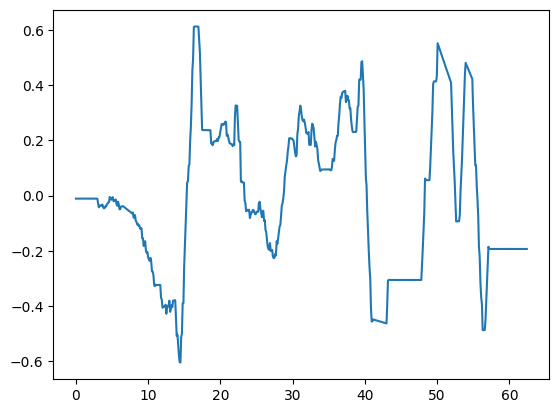

In [21]:
x, y = collect(log, 0, 'px')
plt.plot(x, y)
plt.show()

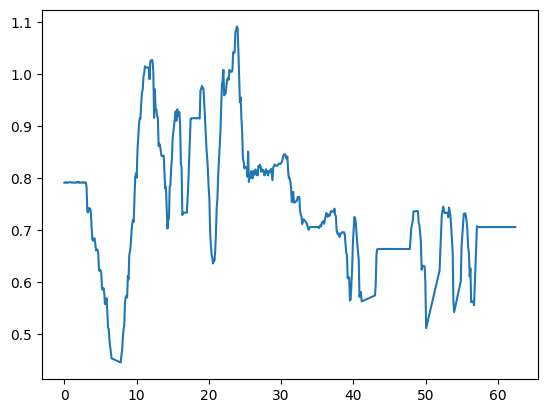

In [23]:
x, y = collect(log, 0, 'pz')
plt.plot(x, y)
plt.show()

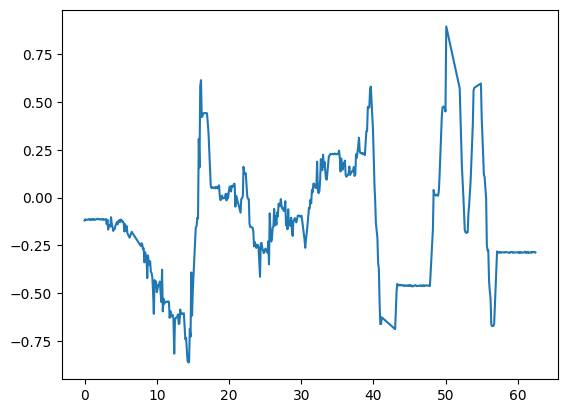

In [27]:
x, y = collect(log, 0, 'ax')
plt.plot(x, y)
plt.show()